# Importing essential Libraries

In [1]:
import pandas as pd 
import numpy as np
import pickle 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Loading the dataset

In [2]:
df=pd.read_csv("ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Data Cleaning

__Removing the unwanted columns__

In [3]:
columns_to_remove=['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=columns_to_remove,axis=1,inplace=True)

In [4]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [5]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

__Keeping only consistent teams__

In [6]:
consistent_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                  'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 
                  'Delhi Daredevils','Sunrisers Hyderabad']       

In [7]:
# df have all the teams right now, so we can take the consistent_teams 
# and filter it out from the batting team and bowling team.

df=df[(df['bat_team'].isin(consistent_teams))&(df['bowl_team'].isin(consistent_teams))]

In [8]:
#Since to predict the score we need to have atleast 5 overs of data
# Hence removing the first 5 overs data in every match

df=df[df['overs']>=5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [9]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())           #both teams will be same since we have removed all the unnecessary teams

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.1+ MB


In [11]:
#Converting the column "date" from string  into datetime object

from datetime import datetime
df['date']=df['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

# Data Preprocessing

In [12]:
#Converting the categorical features using OneHotEncoding method

encoded_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


__Rearranging the columns__

In [13]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [14]:
encoded_df=encoded_df[['date',  'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

# Train Test Split

In [15]:
#Since this is the time series type data so I am spliting the traing dataset <=2016(year) and testing dataset >=2017(year)

X_train=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
X_test=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>=2017]

In [16]:
y_train=encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
y_test=encoded_df[encoded_df['date'].dt.year>=2017]['total'].values

In [17]:
#Removing the date column since it was just required to do train test split

X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)

# Model Building

I am just trying to run this project with 3 different algorithms i.e Linear Regression ,Ridge Regression, Lasso Regression

__Linear Regression Model__

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

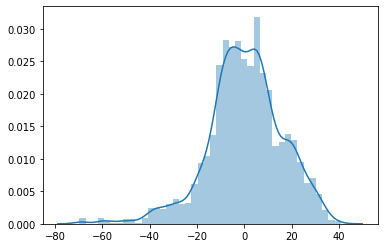

In [19]:
prediction_lr=regressor.predict(X_test)
import seaborn as sns
sns.distplot(y_test-prediction_lr)

In [20]:
from sklearn import metrics
import numpy as np
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,prediction_lr))
print("Mean squared error: ",metrics.mean_squared_error(y_test,prediction_lr))
print("Root Mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction_lr)))

Mean absolute error:  12.118617546193295
Mean squared error:  251.0079231041742
Root Mean squared error:  15.8432295667321


__Ridge Regression Model__

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}  #e-15 means 10^-15 and i have provided different values
                                                                        # so that i can give for the Hyperparameter tuning
ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)  #cross validation can be any number
ridge_regressor.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [22]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 35}
-328.45014852204355


In [23]:
prediction_ridge=ridge_regressor.predict(X_test)

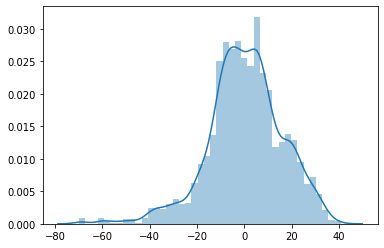

In [24]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)

In [25]:
from sklearn import metrics
import numpy as np
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,prediction_ridge))
print("Mean squared error: ",metrics.mean_squared_error(y_test,prediction_ridge))
print("Root Mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction_ridge)))

Mean absolute error:  12.11745961617812
Mean squared error:  251.02870657211633
Root Mean squared error:  15.843885463235221


__Lasso Regression__


In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [27]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.8221491835716


In [28]:
prediction_lasso=lasso_regressor.predict(X_test)

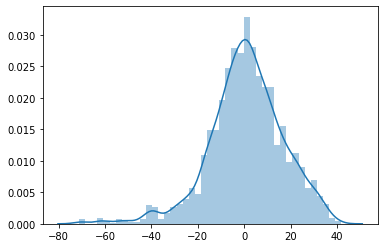

In [29]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

In [30]:
from sklearn import metrics
import numpy as np
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,prediction_lasso))
print("Mean squared error: ",metrics.mean_squared_error(y_test,prediction_lasso))
print("Root Mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction_lasso)))

Mean absolute error:  12.213583996827493
Mean squared error:  262.3653827960697
Root Mean squared error:  16.197696836157593


# Creating a Pickle file for the classifier

In [31]:
filename='first-innings-score-lr-model.pkl'
pickle.dump(lasso_regressor,open(filename,'wb'))